## Momentum Gradient Descent

Optimal position for sample_function_1: [1.00000201 2.00000403]
sample_function_1 value at optimal position: 2.0295296937065052e-11


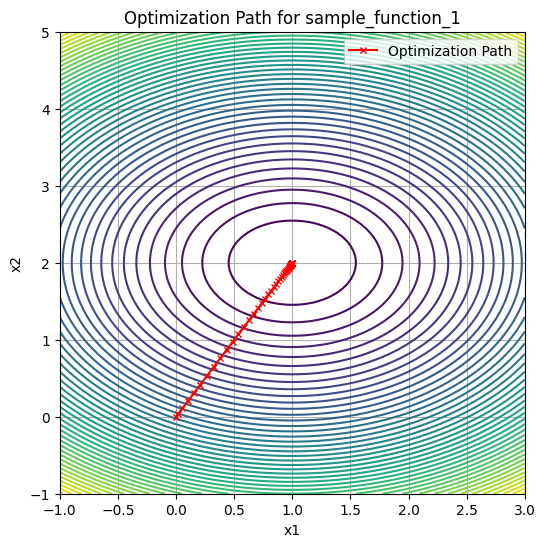

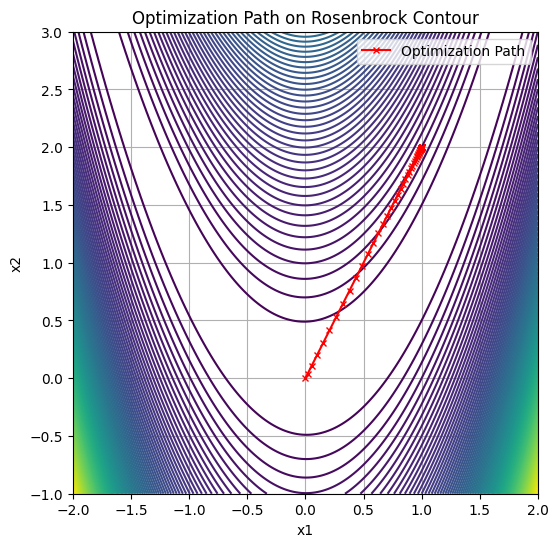

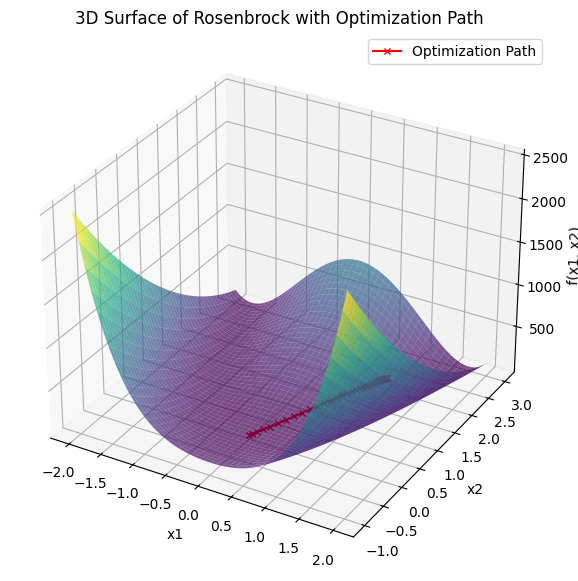

In [9]:
"""
Momentum Gradient Descent for Optimizing Functions

This implementation leverages momentum-based gradient descent to optimize an objective function.
By including a "momentum" term, the algorithm aims to smooth the optimization trajectory and potentially
achieve faster convergence by accumulating previous gradients.



### Methodology:
1. **Initialization**: Begin with an initial guess x^(0) and set the maximum number of iterations.
2. **Set Momentum Term**: Initialize the momentum term v^(0) = 0.
3. **Iterate**: For each iteration k:
   - **Compute Gradient**: Calculate the gradient ∇f(x^(k)) at the current position.
   - **Update Momentum**:
     v^(k) = γ * v^(k-1) + α * ∇f(x^(k))
     where:
       - γ is the momentum coefficient, with 0 < γ < 1
       - α is the learning rate.
   - **Update Position**:
     x^(k+1) = x^(k) - v^(k)
   - **Increment Iteration Counter**: Move to the next iteration, k = k + 1.
4. **Convergence Check**: Repeat steps 3a–3d until the stopping criteria are met
(e.g., the norm of the gradient is smaller than a specified threshold ε).
5. **Output**: Return the optimized position x and the path taken during optimization.


"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MomentumOptimizer:
    def __init__(self, func, grad_func, learning_rate=0.1, momentum=0.9, tolerance=1e-5, max_steps=1000):
        self.func = func               # Function to minimize
        self.grad_func = grad_func     # Gradient of the function
        self.learning_rate = learning_rate  # Step size multiplier
        self.momentum = momentum       # Momentum coefficient
        self.tolerance = tolerance     # Convergence threshold
        self.max_steps = max_steps     # Cap on iteration count

    def optimize(self, start_point):
        x = start_point
        velocity = np.zeros_like(x)    # Initialize momentum term
        iteration = 1                  # Step counter
        path = [x.copy()]              # Track the optimization trajectory

        while iteration < self.max_steps:
            gradient = self.grad_func(x)  # Compute gradient
            # Check if gradient is small enough to stop
            if np.linalg.norm(gradient) < self.tolerance:
                break
            # Update the momentum term
            velocity = self.momentum * velocity + self.learning_rate * gradient
            # Update position with momentum step
            x = x - velocity
            path.append(x.copy())       # Save path for visualization
            iteration += 1              # Increment iteration count

        return x, path

# Objective function and gradient
def sample_function_1(x):
    """Objective function 1: f(x) = (x[0] - 1)^2 + (x[1] - 2)^2"""
    return (x[0] - 1) ** 2 + (x[1] - 2) ** 2

def sample_gradient_1(x):
    """Gradient of the example objective function 1"""
    return np.array([2 * (x[0] - 1), 2 * (x[1] - 2)])

# Rosenbrock function and gradient
def rosenbrock_function(x):
    """Rosenbrock function: f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2"""
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

# Plotting functions
def plot_sample_function_1_contour(path):
    """Plot the contour of sample_function_1 with its optimization path."""
    x_vals = np.linspace(-1, 3, 100)
    y_vals = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = sample_function_1(np.array([X, Y]))

    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], color='red', marker='x', markersize=5, linestyle='-', label="Optimization Path")
    plt.title("Optimization Path for sample_function_1")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rosenbrock_contour_with_path(path):
    """Plot the contour of the Rosenbrock function with the path of sample_function_1's optimization."""
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-1, 3, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_function(np.array([X, Y]))

    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], color='red', marker='x', markersize=5, linestyle='-', label="Optimization Path")
    plt.title("Optimization Path on Rosenbrock Contour")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rosenbrock_3d_with_path(path):
    """3D plot of the Rosenbrock function with the optimization path of sample_function_1."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-1, 3, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_function(np.array([X, Y]))

    # Plot the 3D surface
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    path = np.array(path)
    # Plot the optimization path on the surface
    path_z = np.array([rosenbrock_function(p) for p in path])
    ax.plot(path[:, 0], path[:, 1], path_z, color='red', marker='x', markersize=5, linestyle='-', label="Optimization Path")

    ax.set_title("3D Surface of Rosenbrock with Optimization Path")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x1, x2)")
    ax.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Starting point
    starting_point = np.array([0.0, 0.0])

    # Optimizer for sample_function_1
    optimizer = MomentumOptimizer(sample_function_1, sample_gradient_1, learning_rate=0.01, momentum=0.75)
    optimal_x, path = optimizer.optimize(starting_point)

    # Print optimal result
    print("Optimal position for sample_function_1:", optimal_x)
    print("sample_function_1 value at optimal position:", sample_function_1(optimal_x))

    # Display all three plots
    plot_sample_function_1_contour(path)
    plot_rosenbrock_contour_with_path(path)
    plot_rosenbrock_3d_with_path(path)
